In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading data

In [3]:
data = pd.read_csv('data/data.csv')
genre_data = pd.read_csv('data/data_by_genres.csv')
year_data = pd.read_csv('data/data_by_year.csv')
artist_data = pd.read_csv('data/data_by_artist.csv')
data_w_genre = pd.read_csv('data/data_w_genres.csv')
tracks_2022 = pd.read_csv('data/track_data.csv')

sns.set_theme()

# Statistical relationships

## Scatterplot

Year vs. Popularity

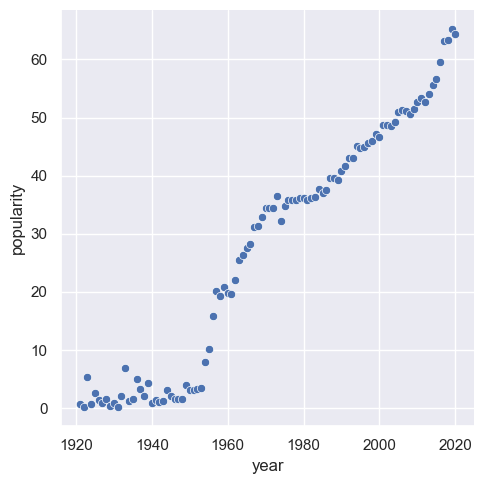

In [4]:
sns.relplot(data = year_data, x = 'year', y = 'popularity')

Track popularity vs. Artist popularity

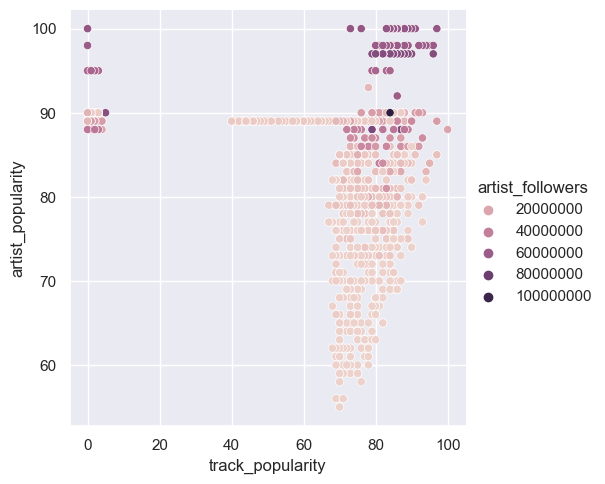

In [5]:
sns.relplot(data = tracks_2022, y = 'artist_popularity', x = 'track_popularity', hue='artist_followers')

## Lineplot

<AxesSubplot: xlabel='year', ylabel='acousticness'>

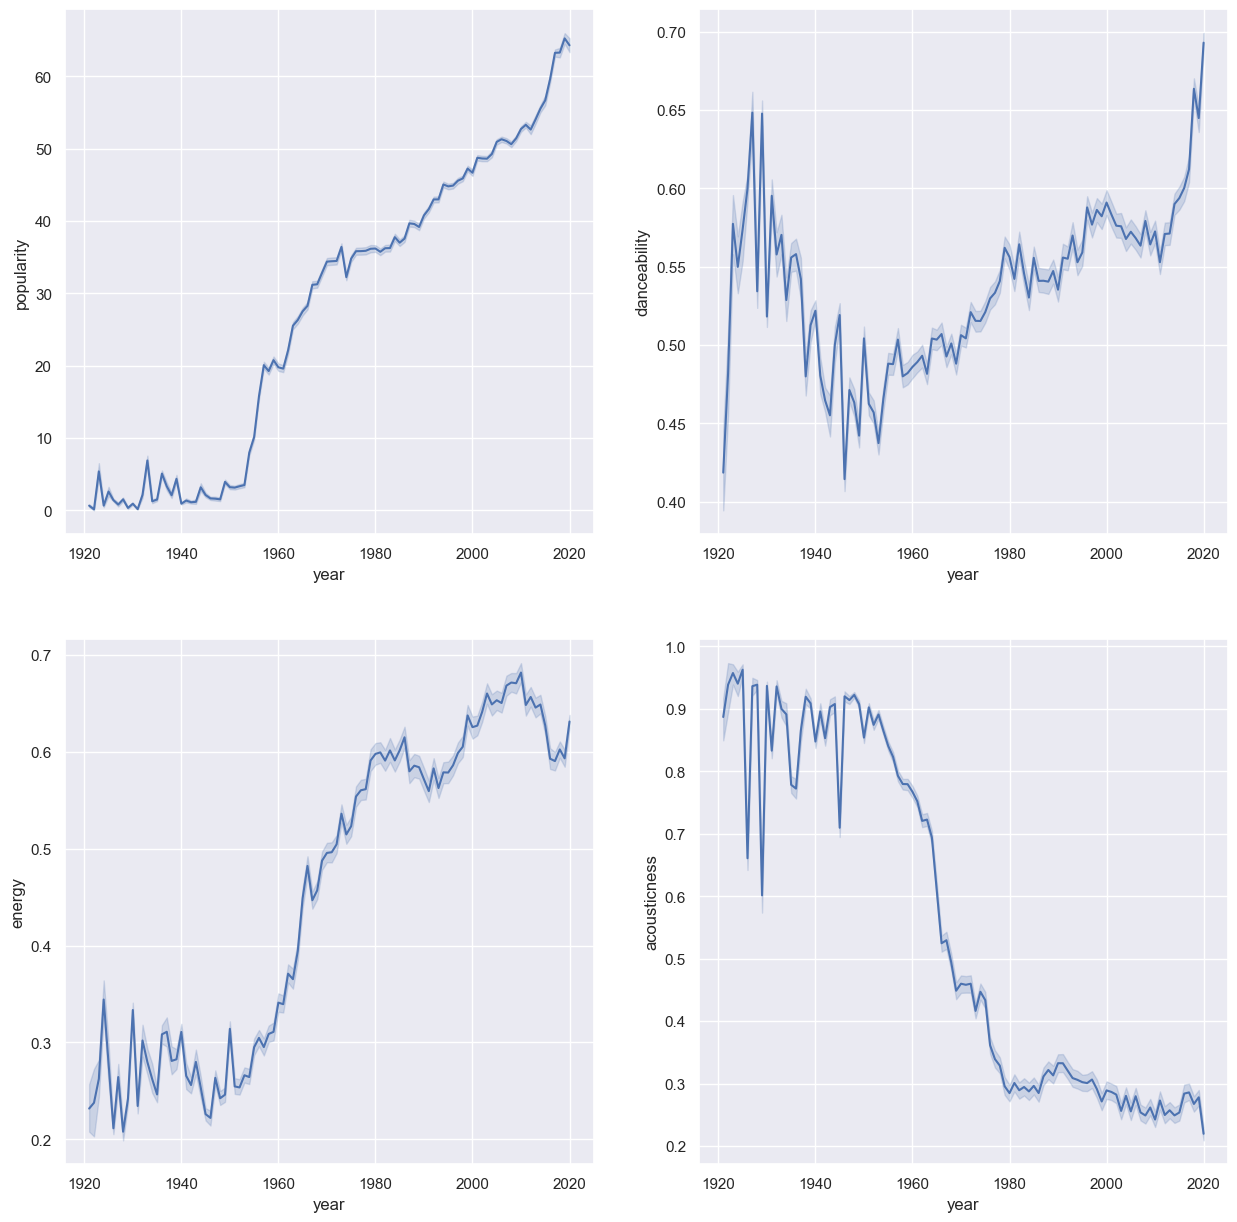

In [6]:
fig, axes = plt.subplots(2,2, figsize=(15,15))
sns.lineplot(data = data, x = 'year', y = 'popularity', ax=axes[0,0])
sns.lineplot(data = data, x = 'year', y = 'danceability', ax=axes[0,1])
sns.lineplot(data = data, x = 'year', y = 'energy', ax=axes[1,0])
sns.lineplot(data = data, x = 'year', y = 'acousticness', ax=axes[1,1])

In [7]:
data_w_genre.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


# Distributions of data

## Histogram

In [8]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)
year_data['decade'] = year_data['year'].apply(get_decade)

<AxesSubplot: xlabel='acousticness', ylabel='Count'>

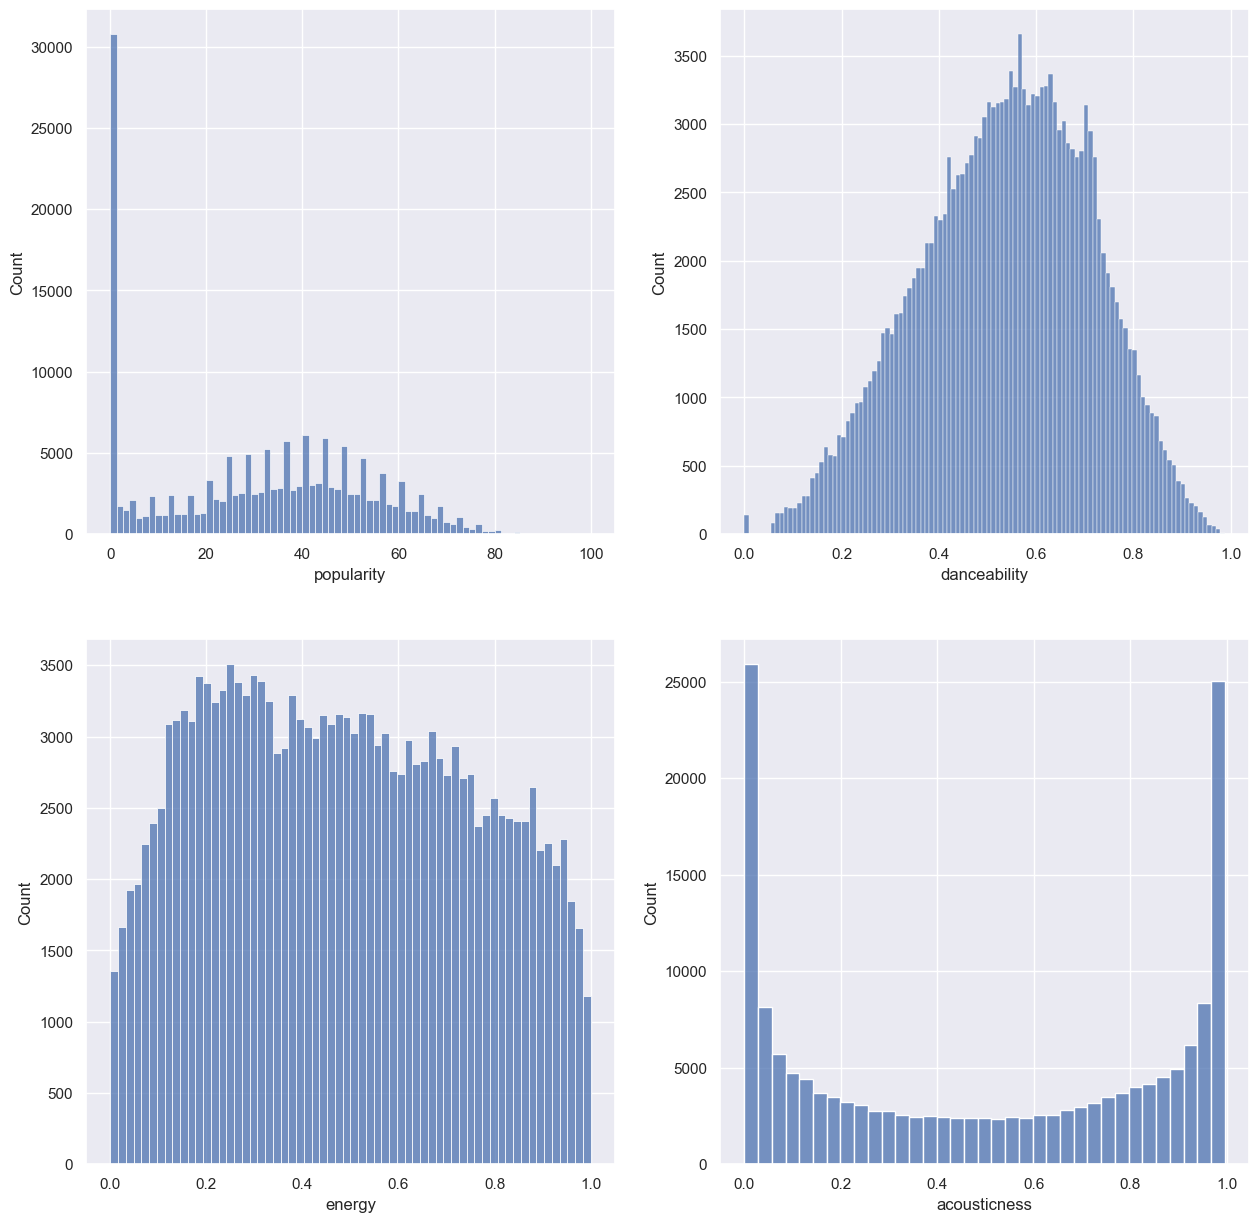

In [9]:
fig, axes = plt.subplots(2,2, figsize=(15,15))
sns.histplot(data = data, x = 'popularity', ax=axes[0,0])
sns.histplot(data = data, x = 'danceability', ax=axes[0,1])
sns.histplot(data = data, x = 'energy', ax=axes[1,0])
sns.histplot(data = data, x = 'acousticness', ax=axes[1,1])


<AxesSubplot: xlabel='danceability', ylabel='Density'>

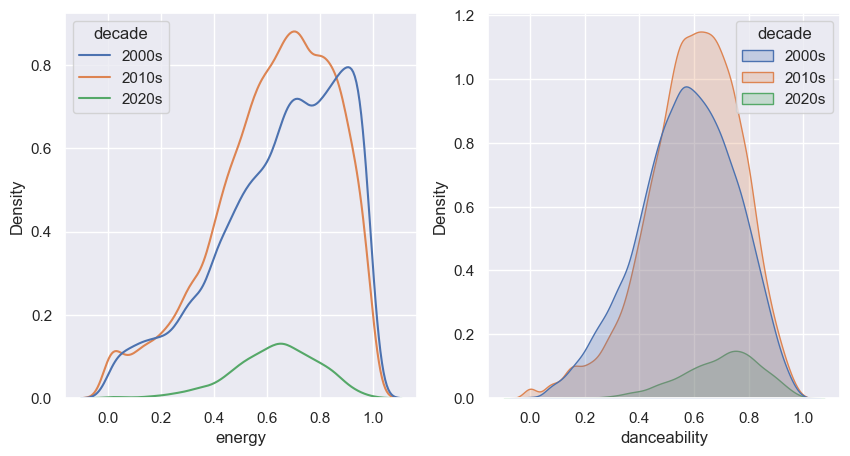

In [10]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
data_21st = data.loc[data['year'] > 2000]
sns.kdeplot(data = data_21st, x = 'energy', ax=axes[0], hue='decade')
sns.kdeplot(data = data_21st, x = 'danceability', ax=axes[1], hue='decade', fill=True)

<AxesSubplot: xlabel='popularity', ylabel='Proportion'>

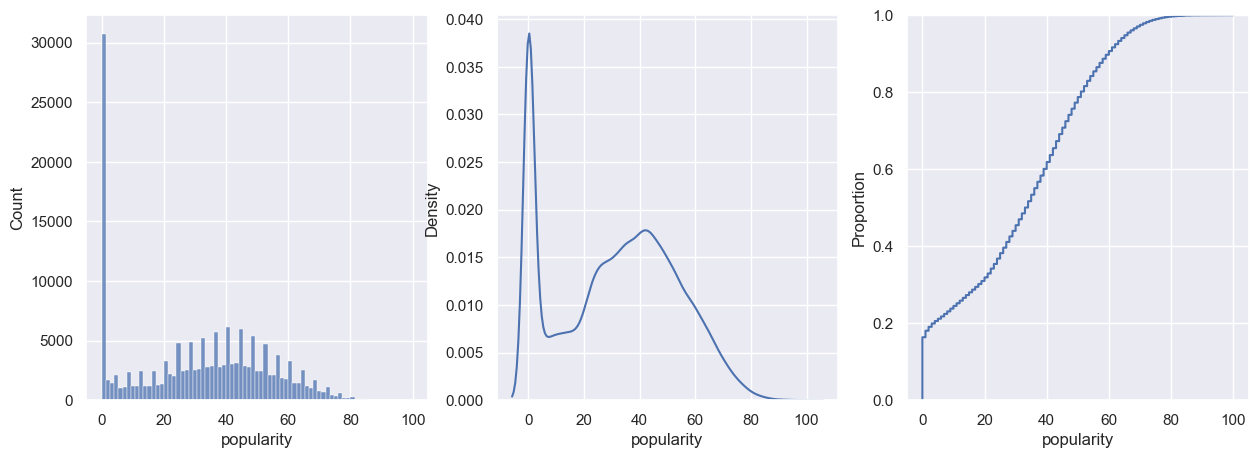

In [11]:
fig, axes = fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(data=data, x='popularity', ax = axes[0])
sns.kdeplot(data=data, x='popularity', ax = axes[1])
sns.ecdfplot(data=data, x='popularity', ax = axes[2])

## Bivariate distributions 

<AxesSubplot: xlabel='danceability', ylabel='tempo'>

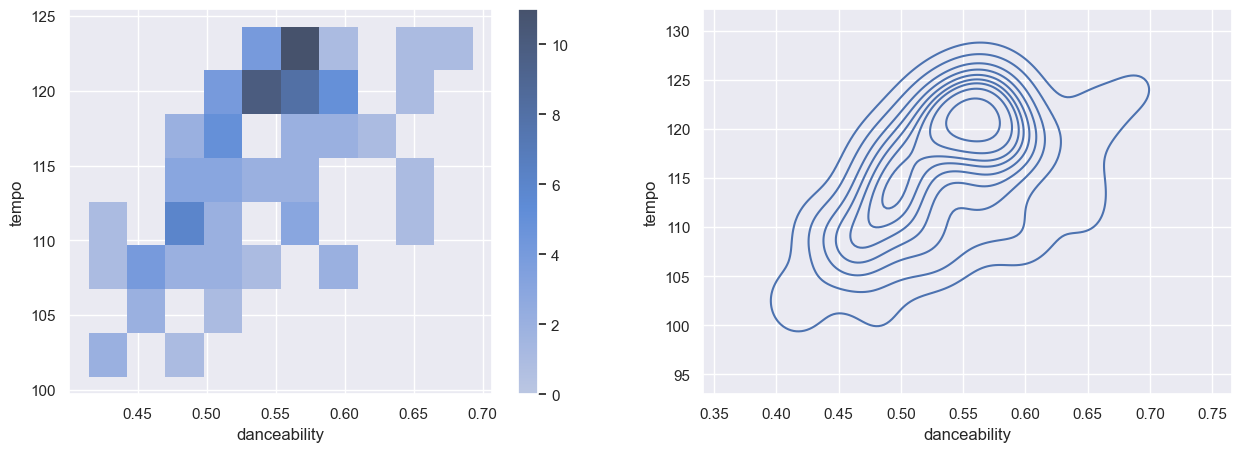

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(data=year_data, x = 'danceability', y = 'tempo', ax=axes[0], cbar=True)
sns.kdeplot(data=year_data, x = 'danceability', y = 'tempo', ax=axes[1])

## Plotting many distributions

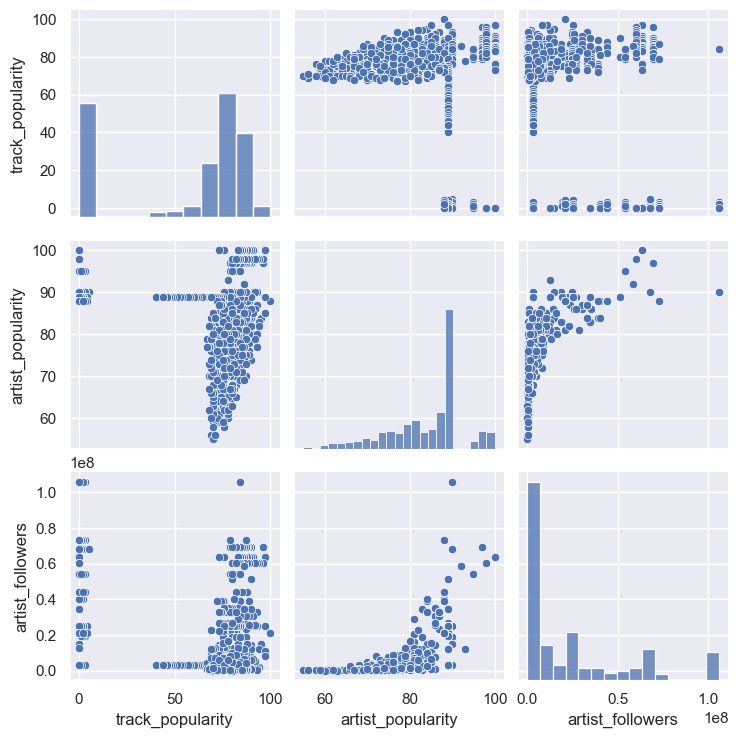

In [13]:
sns.pairplot(tracks_2022)

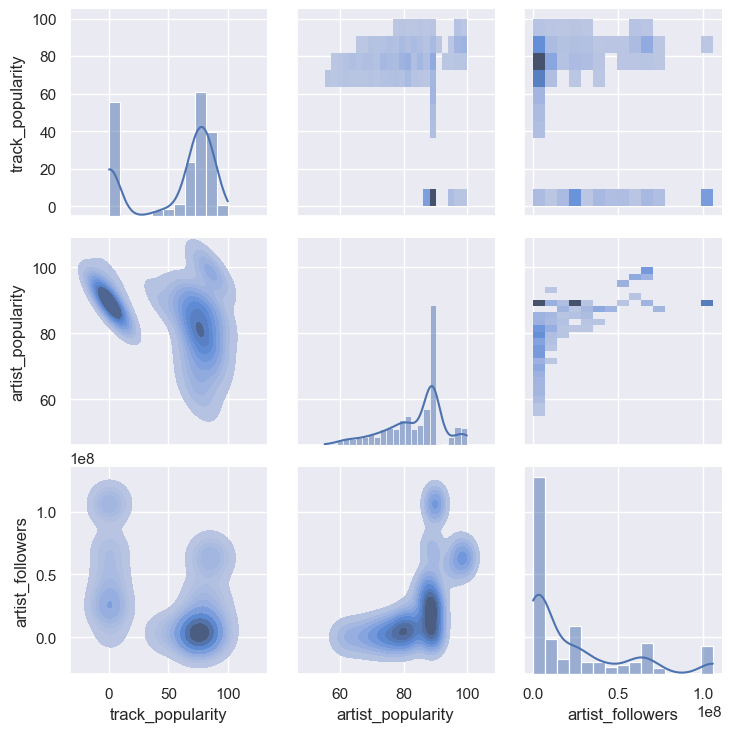

In [14]:
g = sns.PairGrid(tracks_2022)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

# Categorical Data

<AxesSubplot: xlabel='decade', ylabel='energy'>

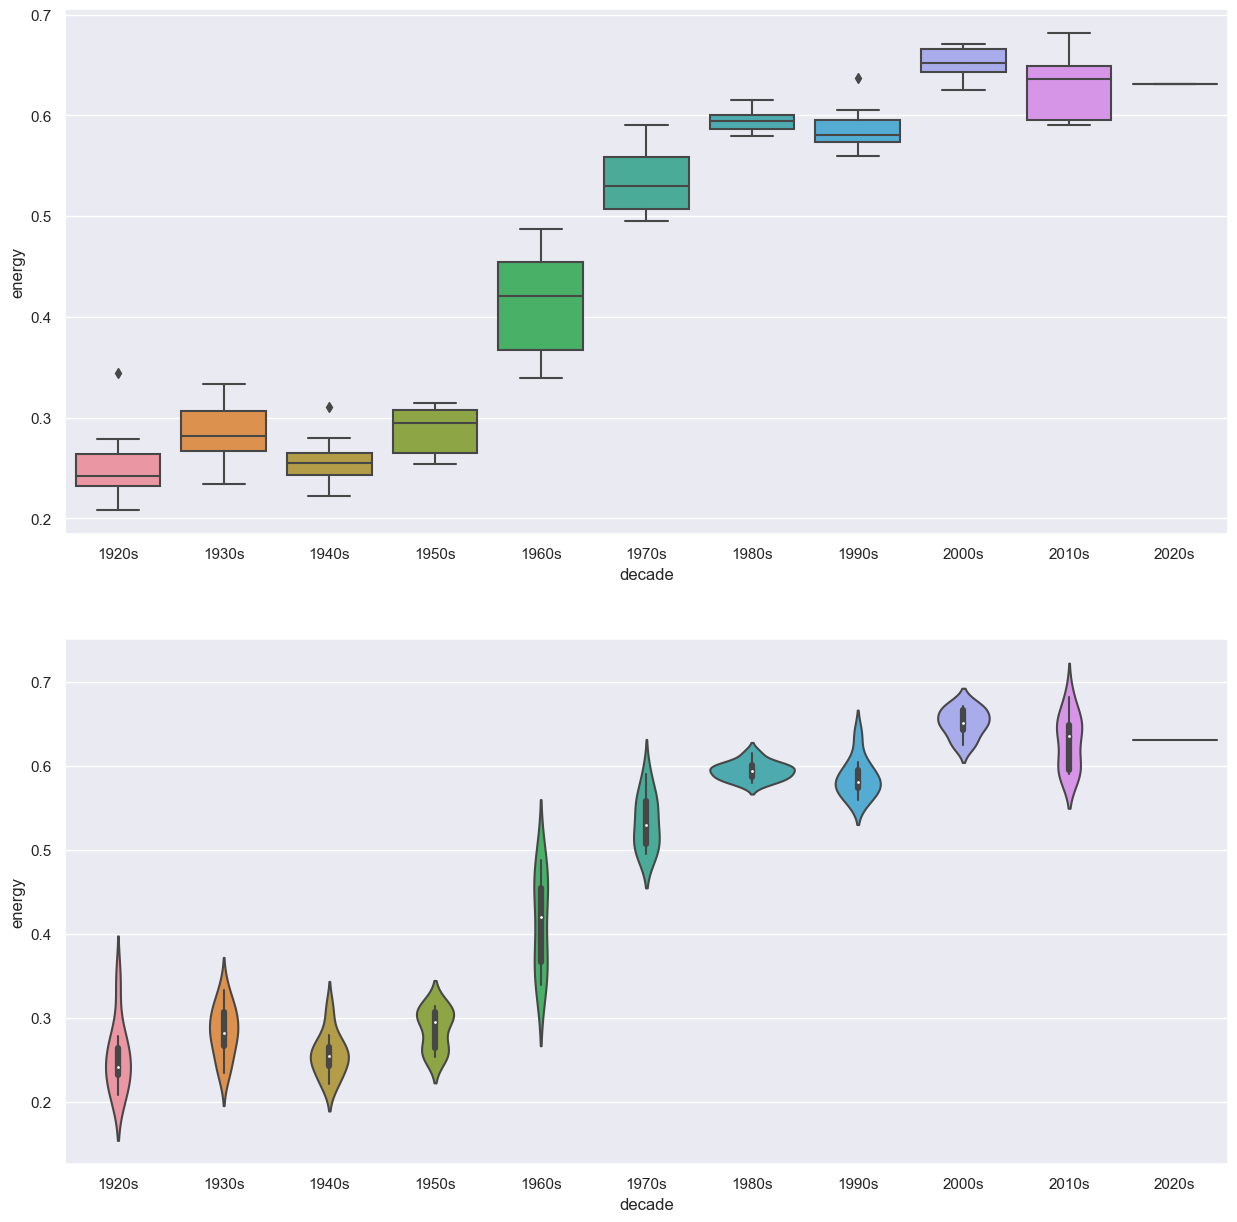

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(15,15))
sns.boxplot(data=year_data, x="decade", y="energy", ax = axes[0])
sns.violinplot(data=year_data, x="decade", y="energy", ax = axes[1])

### Estimating central tendency

#### Barplot

<AxesSubplot: xlabel='key', ylabel='energy'>

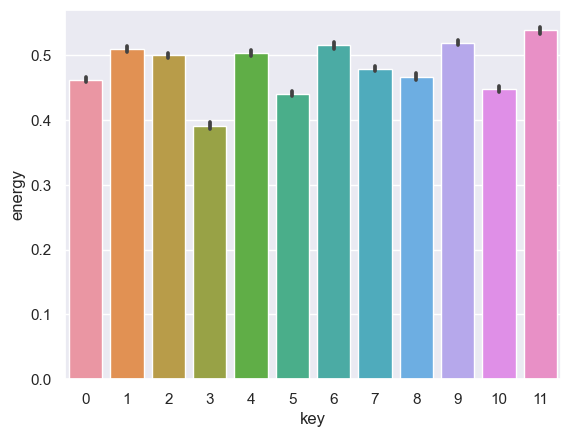

In [29]:
sns.barplot(data = data, x = "key", y = "energy")

#### Pointplot

<AxesSubplot: xlabel='mode', ylabel='liveness'>

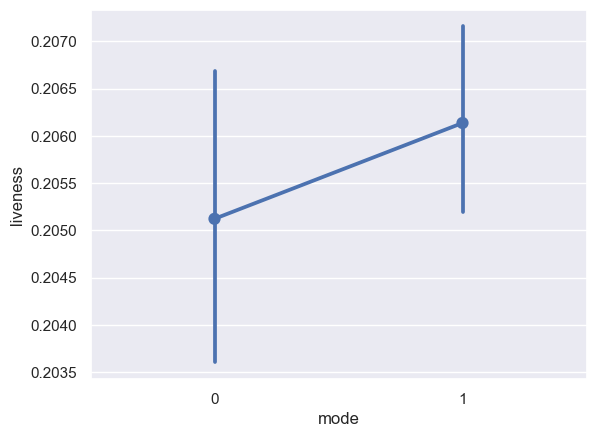

In [33]:
sns.pointplot(data=data, x='mode', y='liveness')

In [22]:
artist_data.nlargest(10, 'count')

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
8367,1,3169,0.984282,Francisco Canaro,0.659676,176986.345850,0.287555,0.537988,0.199492,-12.043738,0.110533,122.743169,0.745212,0.061849,2
28561,1,2422,0.353916,Эрнест Хемингуэй,0.696773,115936.962015,0.188971,0.000027,0.373329,-18.237630,0.926229,111.847911,0.583885,0.066061,11
28560,1,2136,0.297365,Эрих Мария Ремарк,0.693738,121013.185393,0.200289,0.000230,0.195630,-19.259112,0.921277,110.717091,0.536381,0.000000,0
8434,1,1459,0.738865,Frank Sinatra,0.385232,189282.134339,0.236152,0.021148,0.230828,-14.335969,0.049029,109.394801,0.364991,28.658670,5
10714,1,1256,0.985169,Ignacio Corsini,0.545475,154560.711783,0.187842,0.425159,0.182707,-20.862591,0.121051,106.514583,0.638670,0.031847,5
27109,1,1200,0.990092,Vladimir Horowitz,0.343624,266650.370833,0.118341,0.879898,0.182788,-23.190868,0.043228,94.845258,0.224994,3.694167,1
1682,1,1146,0.917843,Arturo Toscanini,0.315980,309308.737347,0.203463,0.474637,0.280793,-17.185234,0.058348,102.235789,0.283423,0.240838,0
2707,1,1103,0.908776,Billie Holiday,0.571550,185677.068903,0.202251,0.013111,0.217323,-13.221339,0.062274,109.883821,0.498693,16.780598,5
12378,1,1061,0.688296,Johnny Cash,0.620759,164491.506126,0.443462,0.017630,0.239843,-11.663137,0.095992,114.508436,0.672277,26.914232,10
7426,1,1023,0.738890,Elvis Presley,0.493966,157592.318671,0.424834,0.053483,0.245853,-12.921860,0.057361,112.397270,0.617856,34.019550,0
